In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c_ins_csv=pd.read_csv('claims Original.csv')
insur=pd.DataFrame(c_ins_csv)
insur.head(10) #First 10 rows of the dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,0
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,0
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,0
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,0
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,0


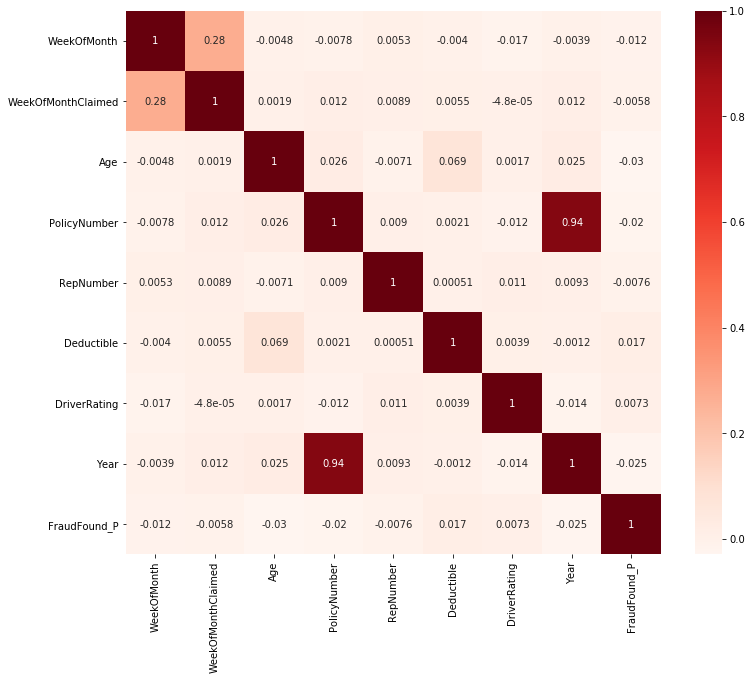

In [2]:
plt.figure(figsize=(12,10))
cor = insur.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
    

In [4]:
#Initialize ChiSquare Class
cT = ChiSquare(insur)

#Feature Selection
testColumns = insur.columns[:-1]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="FraudFound_P" )  

Month is IMPORTANT for Prediction
WeekOfMonth is NOT an important predictor. (Discard WeekOfMonth from model)
DayOfWeek is NOT an important predictor. (Discard DayOfWeek from model)
Make is IMPORTANT for Prediction
AccidentArea is IMPORTANT for Prediction
DayOfWeekClaimed is NOT an important predictor. (Discard DayOfWeekClaimed from model)
MonthClaimed is IMPORTANT for Prediction
WeekOfMonthClaimed is NOT an important predictor. (Discard WeekOfMonthClaimed from model)
Sex is IMPORTANT for Prediction
MaritalStatus is NOT an important predictor. (Discard MaritalStatus from model)
Age is IMPORTANT for Prediction
Fault is IMPORTANT for Prediction
PolicyType is IMPORTANT for Prediction
VehicleCategory is IMPORTANT for Prediction
VehiclePrice is IMPORTANT for Prediction
PolicyNumber is NOT an important predictor. (Discard PolicyNumber from model)
RepNumber is NOT an important predictor. (Discard RepNumber from model)
Deductible is IMPORTANT for Prediction
DriverRating is NOT an important pre

In [12]:
data=[]
dat=[]

In [4]:
import scipy.stats as stats

In [13]:
for x in insur.columns[:-1]:
    cross=pd.crosstab(insur[x], insur['FraudFound_P'])
    data.append([x,(stats.chi2_contingency(cross)[1])])

In [14]:
df=pd.DataFrame(data, columns=['Features','p-value'])

In [15]:
for x in ['WeekOfMonth','Age','PolicyNumber','RepNumber','Deductible','DriverRating','Year']:
    dat.append([x,stats.f_oneway(insur[x], insur['FraudFound_P'])[1]])

In [16]:
dff=pd.DataFrame(dat, columns=['Features','p-value'])

In [17]:
#dff.to_csv(path_or_buf='featuresanova.csv', index=False)

In [65]:
datt=[]

In [21]:
stats.pearsonr(insur['Age'], insur['RepNumber'])

(-0.007062644471112426, 0.3805084146294042)

In [40]:
for x in ['WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber','Deductible','DriverRating','Year']:
    for y in ['WeekOfMonth','Age','PolicyNumber','RepNumber','Deductible','DriverRating','Year']:
        datt.append([x,y,stats.pearsonr(insur[x], insur[y])[1]])

In [70]:
datt=pd.DataFrame(datt, columns=['Feature','Target Feature','Type of Test','p-value'])

In [73]:
#datt.to_csv(path_or_buf='features_vs_tests.csv', index=False)

In [60]:
np.array(['Month', 'DayOfWeek', 'Make', 'AccidentArea','DayOfWeekClaimed', 'MonthClaimed', 'Sex','MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder','PoliceReportFiled', 'WitnessPresent', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy']).size

24

In [66]:
for x in ['Month', 'DayOfWeek', 'Make', 'AccidentArea','DayOfWeekClaimed', 'MonthClaimed', 'Sex','MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder','PoliceReportFiled', 'WitnessPresent', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy']:
    cross=pd.crosstab(insur[x], insur['FraudFound_P'])
    datt.append([x,'FraudFound_P','Chi-Square Test',(stats.chi2_contingency(cross)[1])])

In [68]:
for x in ['WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber','Deductible','DriverRating','Year']:
    datt.append([x,'FraudFound_P','One-Way Anova Test',stats.f_oneway(insur[x], insur['FraudFound_P'])[1]])

### Feature Selection using Random Forest

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [8]:
ccsv=pd.read_csv('Trainnmod.csv')
one_hot=pd.DataFrame(ccsv)

X=one_hot
Y=insur.iloc[:,-1]
feat_labels=one_hot.columns
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=999)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Month_Aug', 0.010450760781614646)
('Month_Dec', 0.010629425327711597)
('Month_Feb', 0.012769631669119232)
('Month_Jan', 0.012439462996120115)
('Month_Jul', 0.01128534764483605)
('Month_Jun', 0.010417600418270171)
('Month_Mar', 0.010770836177080773)
('Month_May', 0.011867570367924844)
('Month_Nov', 0.008678726465362272)
('Month_Oct', 0.011429967179108724)
('Month_Sep', 0.007548016857764783)
('Make_Chevrolet', 0.016906846403734136)
('Make_Honda', 0.022871069285362082)
('Make_Mazda', 0.01960767812368306)
('Make_Pontiac', 0.02708164886952132)
('Make_Toyota', 0.02806181633207446)
('AccidentArea_Urban', 0.02423642353639141)
('MonthClaimed_Apr', 0.011644830020395552)
('MonthClaimed_Aug', 0.01202437917976056)
('MonthClaimed_Dec', 0.008574618057283963)
('MonthClaimed_Feb', 0.012105561727281468)
('MonthClaimed_Jan', 0.010589891333024607)
('MonthClaimed_Jul', 0.008816055314779924)
('MonthClaimed_Jun', 0.011409219160706004)
('MonthClaimed_Mar', 0.012958931644490487)
('MonthClaimed_May', 0.013754

C:\Users\Avitrya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
sfm = SelectFromModel(clf, threshold=0.02)
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Make_Honda
Make_Pontiac
Make_Toyota
AccidentArea_Urban
Sex_Male
Fault_Third Party
VehiclePrice_30000 to 39000
PastNumberOfClaims_2 to 4
PastNumberOfClaims_none
AgeOfVehicle_6 years
AgeOfVehicle_7 years
AgeOfVehicle_more than 7
AgeOfPolicyHolder_31 to 35
AgeOfPolicyHolder_36 to 40
AgeOfPolicyHolder_41 to 50
NumberOfSuppliments_3 to 5
NumberOfSuppliments_more than 5
NumberOfSuppliments_none


In [7]:
insurr=one_hot[['Fault_Third Party','PastNumberOfClaims_2 to 4','PastNumberOfClaims_none','AgeOfVehicle_7 years','AgeOfPolicyHolder_31 to 35','NumberOfSuppliments_none']]

In [8]:
insurr.to_csv(path_or_buf='RanThres', index=False)

### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
#abelencoder = LabelEncoder()
dfform)

KeyError: ('Sex', 'AccidentArea')

In [17]:
insur['Sex']

0        0
1        1
2        1
3        1
4        0
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       0
        ..
15390    0
15391    0
15392    1
15393    1
15394    1
15395    1
15396    1
15397    0
15398    1
15399    1
15400    1
15401    1
15402    1
15403    1
15404    1
15405    1
15406    1
15407    1
15408    1
15409    0
15410    0
15411    1
15412    0
15413    1
15414    1
15415    1
15416    1
15417    1
15418    0
15419    1
Name: Sex, Length: 15420, dtype: int32